In [24]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Load the three different csvs

In [3]:
dem = pd.read_csv(r'C:\Users\anget\OneDrive\Desktop\Kantar_CodingTask\Kantar_CodingTask\data\dem.csv')
device = pd.read_csv(r'C:\Users\anget\OneDrive\Desktop\Kantar_CodingTask\Kantar_CodingTask\data\device.csv')
viewing = pd.read_csv(r'C:\Users\anget\OneDrive\Desktop\Kantar_CodingTask\Kantar_CodingTask\data\viewings.csv')

# hh is the households

In [6]:
dem.head()

,hh_id,person_number,age,gender
0,7,1,52,1
1,7,2,54,0
2,50,1,49,1
3,50,3,21,1
4,50,4,11,1


# How many households are on the dem file?

In [11]:
dem.iloc[:,0].nunique()

500

In [14]:
#len(dem.iloc[:,0].unique())

# The number of unique households on the dem csv file is 500

In [7]:
device.head()

,hh_id,device_number,type
0,1763,8,desktop
1,3837,10,tablet
2,3983,10,laptop
3,16371,8,desktop
4,16371,10,tablet


In [18]:
device.iloc[:,0].nunique()

168

# Here we obtain the unique number of the households that has at least on device

# Question: What proportion of these households have at least 1 online device?

# Answer: 168 households have at least on device from the 500 households that we have, therefores the proportion is 168/500 = 0,336

# Question: what is the typical number of online devic es per household?

# Answer: Here we have to find the total number of devices and the total number of housholds is 500.

In [20]:
len(device)

333

# Answer: This means that we have 333 devices, so the mean number of device per houshold is 333/500 = 0.666

In [21]:
group_age = np.zeros((len(dem),1))

for i in range(0,len(dem)):
    if dem.iloc[i,2] < 10:
        group_age[i] = 0
    elif dem.iloc[i,2] < 25:
        group_age[i] = 1
    elif dem.iloc[i,2] < 44:
        group_age[i] = 2
    elif dem.iloc[i,2] < 64:
        group_age[i] = 3
    else:
        group_age[i]= 4

In [22]:
group_age

array([[3.],
       [3.],
       [3.],
       ...,
       [0.],
       [4.],
       [4.]])

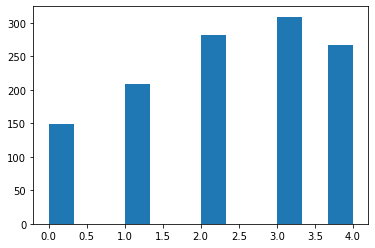

In [26]:
population_distribution = plt.hist(group_age, bins='auto')

# Question What is the distribution of demographics groups?

# Answer: The distribution seems to be a negatively skewed distribution

In [173]:
viewing

,hh_id,person_number,device_number,date,channel,start,duration,genre,pgm_length
0,16371,1,8,2015-10-06,44,910,2,901.0,194.0
1,41113,1,13,2015-10-09,44,1809,10,901.0,29.0
2,41113,1,13,2015-10-09,44,1825,12,901.0,29.0
3,41113,1,13,2015-10-09,44,1825,12,902.0,28.0
4,41113,1,13,2015-10-09,44,1838,14,902.0,28.0
...,...,...,...,...,...,...,...,...,...
2843,41197,0,10,2015-11-09,70001,1953,2,NaN,NaN
2844,41197,0,10,2015-11-09,70001,1955,2,NaN,NaN
2845,41197,0,10,2015-11-09,70001,1957,2,NaN,NaN
2846,41197,0,10,2015-11-09,70001,1959,1,NaN,NaN


# What are the 3 most watched in minutes channels for males of age 25 to 44?

# lets merge the group age with the dem

In [174]:
group_age_df = pd.DataFrame(group_age, columns = ['Age_Group'])

In [175]:
new_dataframe = pd.concat([dem,group_age_df], axis=1)

In [176]:
new_dataframe

,hh_id,person_number,age,gender,Age_Group
0,7,1,52,1,3.0
1,7,2,54,0,3.0
2,50,1,49,1,3.0
3,50,3,21,1,1.0
4,50,4,11,1,1.0
...,...,...,...,...,...
1210,90090,1,41,0,2.0
1211,90090,2,10,0,1.0
1212,90090,3,7,0,0.0
1213,90103,1,76,1,4.0


# Here we want the list  households with their respective penrson number. of course they should be on the age group 25-44 and males

In [196]:
new_dataframe_withonly_males = new_dataframe[new_dataframe['gender']==0]

In [197]:
new_dataframe_withonly_males_group_age_25_44 = new_dataframe_withonly_males[new_dataframe_withonly_males['Age_Group']==2]

In [198]:
new_dataframe_withonly_males_group_age_25_44

,hh_id,person_number,age,gender,Age_Group
20,586,2,43,0,2.0
27,656,6,27,0,2.0
30,1075,1,30,0,2.0
35,1078,1,42,0,2.0
48,1320,2,33,0,2.0
...,...,...,...,...,...
1156,41170,2,35,0,2.0
1162,41197,2,29,0,2.0
1170,41301,1,34,0,2.0
1189,41463,2,32,0,2.0


In [199]:
new_dataframe_withonly_males_group_age_25_44 = new_dataframe_withonly_males_group_age_25_44.reset_index()

In [200]:
new_dataframe_withonly_males_group_age_25_44.drop(columns = 'index', inplace=True)
new_dataframe_withonly_males_group_age_25_44

,hh_id,person_number,age,gender,Age_Group
0,586,2,43,0,2.0
1,656,6,27,0,2.0
2,1075,1,30,0,2.0
3,1078,1,42,0,2.0
4,1320,2,33,0,2.0
...,...,...,...,...,...
129,41170,2,35,0,2.0
130,41197,2,29,0,2.0
131,41301,1,34,0,2.0
132,41463,2,32,0,2.0


# person number is 0 mean no-onew watching, therefore we do not need these data

In [201]:
viewing_without = viewing[viewing['person_number'] > 0]

In [202]:
viewing_without

,hh_id,person_number,device_number,date,channel,start,duration,genre,pgm_length
0,16371,1,8,2015-10-06,44,910,2,901.0,194.0
1,41113,1,13,2015-10-09,44,1809,10,901.0,29.0
2,41113,1,13,2015-10-09,44,1825,12,901.0,29.0
3,41113,1,13,2015-10-09,44,1825,12,902.0,28.0
4,41113,1,13,2015-10-09,44,1838,14,902.0,28.0
...,...,...,...,...,...,...,...,...,...
2400,40114,8,17,2015-10-22,70001,2220,2,NaN,NaN
2401,40114,8,17,2015-10-22,70001,2222,8,NaN,NaN
2402,40114,8,17,2015-10-22,70001,2237,11,NaN,NaN
2403,40114,8,17,2015-10-22,70001,2248,11,NaN,NaN


In [203]:
viewing_without = viewing_without.reset_index()

In [204]:
viewing_without.drop(columns = 'index', inplace=True)

In [205]:
viewing_without

,hh_id,person_number,device_number,date,channel,start,duration,genre,pgm_length
0,16371,1,8,2015-10-06,44,910,2,901.0,194.0
1,41113,1,13,2015-10-09,44,1809,10,901.0,29.0
2,41113,1,13,2015-10-09,44,1825,12,901.0,29.0
3,41113,1,13,2015-10-09,44,1825,12,902.0,28.0
4,41113,1,13,2015-10-09,44,1838,14,902.0,28.0
...,...,...,...,...,...,...,...,...,...
2273,40114,8,17,2015-10-22,70001,2220,2,NaN,NaN
2274,40114,8,17,2015-10-22,70001,2222,8,NaN,NaN
2275,40114,8,17,2015-10-22,70001,2237,11,NaN,NaN
2276,40114,8,17,2015-10-22,70001,2248,11,NaN,NaN


In [210]:
auxilary_list_which_indicates_the25_44_males = np.zeros((len(viewing_without),1))

In [207]:
len(auxilary_list_which_indicates_the25_44_males)

2278

In [211]:
for i in range(0,2278):
    for j in range(0,134):
        if((viewing_without.iloc[i,0] == new_dataframe_withonly_males_group_age_25_44.iloc[j,0]) and (viewing_without.iloc[i,1] == new_dataframe_withonly_males_group_age_25_44.iloc[j,1])):
            auxilary_list_which_indicates_the25_44_males[i]=1

In [213]:
age_25_44 = pd.DataFrame(auxilary_list_which_indicates_the25_44_males, columns = ['age_25_44'])

In [214]:
age_25_44

,age_25_44
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2273,0.0
2274,0.0
2275,0.0
2276,0.0


In [215]:
viewing_without

,hh_id,person_number,device_number,date,channel,start,duration,genre,pgm_length
0,16371,1,8,2015-10-06,44,910,2,901.0,194.0
1,41113,1,13,2015-10-09,44,1809,10,901.0,29.0
2,41113,1,13,2015-10-09,44,1825,12,901.0,29.0
3,41113,1,13,2015-10-09,44,1825,12,902.0,28.0
4,41113,1,13,2015-10-09,44,1838,14,902.0,28.0
...,...,...,...,...,...,...,...,...,...
2273,40114,8,17,2015-10-22,70001,2220,2,NaN,NaN
2274,40114,8,17,2015-10-22,70001,2222,8,NaN,NaN
2275,40114,8,17,2015-10-22,70001,2237,11,NaN,NaN
2276,40114,8,17,2015-10-22,70001,2248,11,NaN,NaN


In [216]:
merge_auxilary_indicator_of_the_males_25_44_data = pd.concat([viewing_without,age_25_44],axis=1)

In [217]:
merge_auxilary_indicator_of_the_males_25_44_data

,hh_id,person_number,device_number,date,channel,start,duration,genre,pgm_length,age_25_44
0,16371,1,8,2015-10-06,44,910,2,901.0,194.0,0.0
1,41113,1,13,2015-10-09,44,1809,10,901.0,29.0,0.0
2,41113,1,13,2015-10-09,44,1825,12,901.0,29.0,0.0
3,41113,1,13,2015-10-09,44,1825,12,902.0,28.0,0.0
4,41113,1,13,2015-10-09,44,1838,14,902.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2273,40114,8,17,2015-10-22,70001,2220,2,NaN,NaN,0.0
2274,40114,8,17,2015-10-22,70001,2222,8,NaN,NaN,0.0
2275,40114,8,17,2015-10-22,70001,2237,11,NaN,NaN,0.0
2276,40114,8,17,2015-10-22,70001,2248,11,NaN,NaN,0.0


In [218]:
males_25_44 = merge_auxilary_indicator_of_the_males_25_44_data[merge_auxilary_indicator_of_the_males_25_44_data['age_25_44']>0]

In [221]:
males_25_44

,hh_id,person_number,device_number,date,channel,start,duration,genre,pgm_length,age_25_44
5,40220,1,10,2015-10-10,44,1820,38,661.0,125.0,1.0
6,40220,1,10,2015-10-10,44,1902,78,661.0,125.0,1.0
13,40220,1,10,2015-10-11,44,1917,43,661.0,41.0,1.0
17,40220,1,10,2015-10-18,44,1816,51,1201.0,60.0,1.0
18,40220,1,10,2015-10-18,44,1907,3,1201.0,60.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1951,41197,2,10,2015-10-20,70005,2030,2,NaN,NaN,1.0
1952,41197,2,10,2015-10-20,70005,2032,6,NaN,NaN,1.0
1953,41197,2,10,2015-10-20,70005,2038,1,NaN,NaN,1.0
1954,41197,2,10,2015-10-20,70005,2039,1,NaN,NaN,1.0


In [225]:
a = males_25_44.groupby('channel').sum('duration')

In [226]:
a

,hh_id,person_number,device_number,start,duration,genre,pgm_length,age_25_44
channel,,,,,,,,
44,1367480,34,340,61534,1199,30542.0,1911.0,34.0
94,1610128,40,406,60138,791,41672.0,1778.0,40.0
4236,1466588,36,388,52427,167,62652.0,1266.0,36.0
4237,2184522,102,560,73277,247,84280.0,639.0,56.0
4252,80856,3,20,3522,4,2414.0,97.0,2.0
4650,81434,2,22,3929,14,3006.0,44.0,2.0
4793,81272,4,20,2253,4,1406.0,408.0,2.0
4817,36729,2,10,2010,2,9999.0,183.0,1.0
4925,40717,1,11,1750,1,9999.0,57.0,1.0


# ANSWER 6: The most popular channels for males are 44 94 4236